In [1]:
# example.ipynb

from chemoecology_tools.core import GCMSExperiment
from chemoecology_tools.analysis import calculate_enrichment_table,perform_nmds
from chemoecology_tools.visualization import plot_nmds
from chemoecology_tools.utils import fetch_pubchem_data


In [15]:
USER_PROVIDED_CHEMICAL_METADATA_PATH = "../example_data/user_provided_chemical_metadata.yaml"

In [16]:
# Load experimental data with metadata
experiment = GCMSExperiment.from_files(
    abundance_path="../example_data/LBAL23_relative_abundance.csv",
    metadata_path="../example_data/LBAL23_metadata.csv",
    id_col="Bee #",
    fetch_pubchem=True,
    filter_dict={
        "CHC File Located": ["NO", "Bleed"],
        "Quality": ["poor", "contaminated"],
        "Nest Code": ["E-JS-030", "E-JS-033", "E-JS-037", "E-KO-140", "E-KO-143"]
    },
    user_chemical_metadata=USER_PROVIDED_CHEMICAL_METADATA_PATH
)

In [17]:
print(experiment)

Unnamed experiment: 84 samples, 48 chemicals measured


In [18]:
# Filter and process data
filtered = experiment.filter_trace_compounds(threshold=0.005)
relative = filtered.calculate_relative_abundance()

In [5]:
nmds_df = perform_nmds(relative)

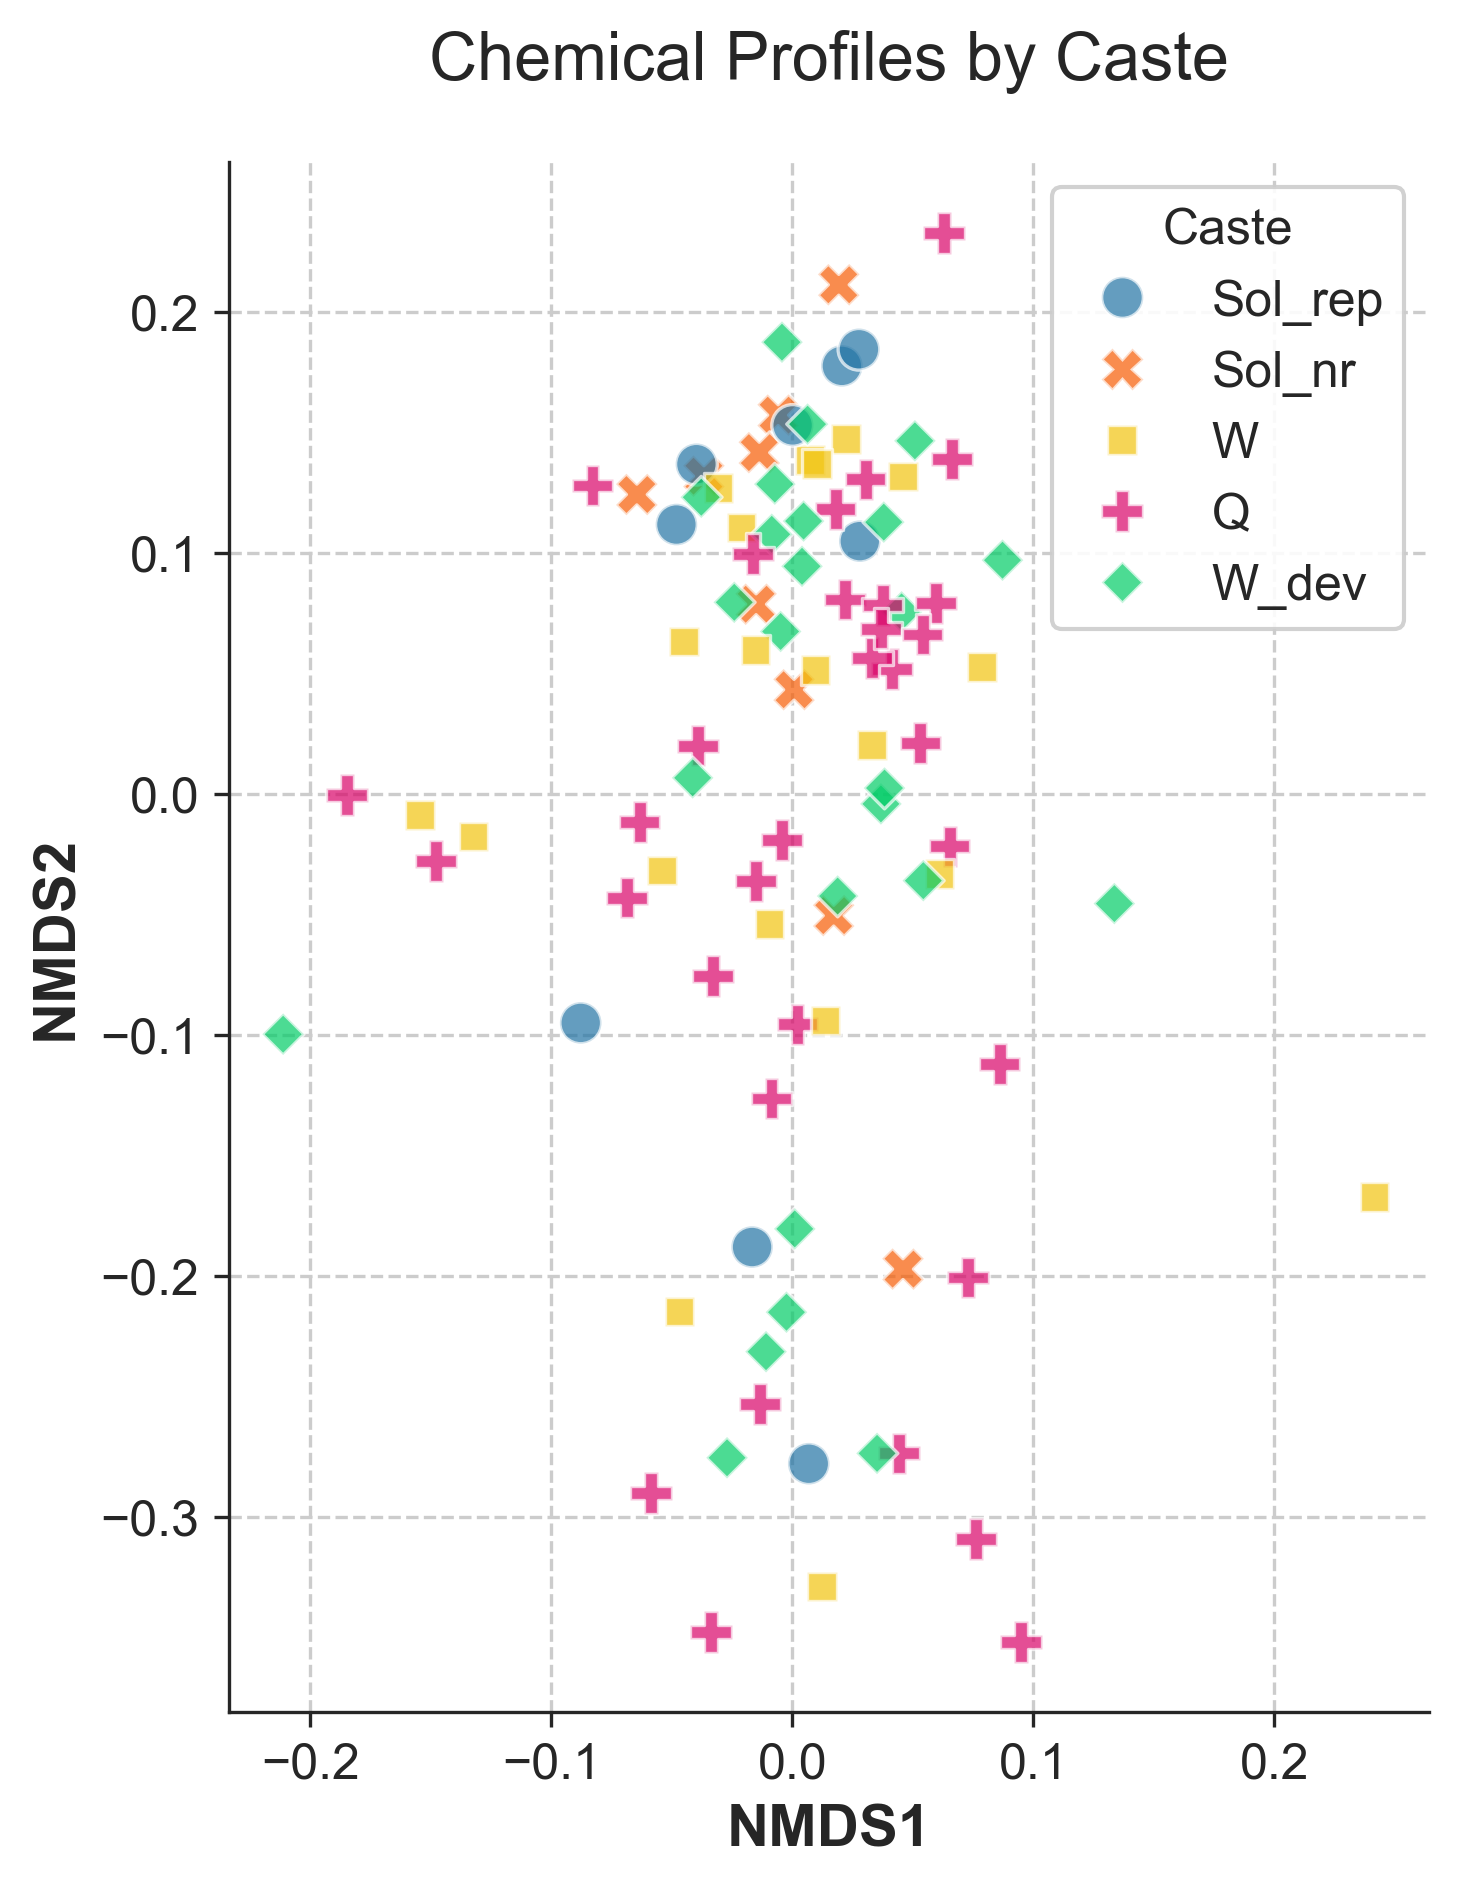

In [ ]:
# Create plots with different groupings
# By caste
fig1 = plot_nmds(
    experiment=relative,
    nmds_coords=nmds_df,
    group_col="Caste",
    title="Chemical Profiles by Caste"
)

In [ ]:
# Generate enrichment table
enrichment_table = calculate_enrichment_table(
    experiment=filtered,
    group_column='Caste',
    class_column='class',
    alpha=0.05
)

In [22]:
enrichment_table

,Chemical Class,Compound,KW_pvalue,Group Bias,Sol_rep,Sol_nr,W,Q,W_dev
7,Aldehyde,Eicosanal,2.499345e-01,,0.00 ± 0.00,0.00 ± 0.00,0.00 ± 0.00,0.00 ± 0.00,0.00 ± 0.00
2,Aldehyde,Octadecanal,3.904228e-01,,0.00 ± 0.00,0.00 ± 0.00,0.00 ± 0.00,0.00 ± 0.00,0.00 ± 0.00
3,Alkane,Heneicosane,7.641474e-06,"Sol_nr, Sol_rep",1.87 ± 0.58,1.72 ± 0.61,0.05 ± 0.00,0.09 ± 0.02,0.08 ± 0.02
26,Alkane,Heptacosane,4.306533e-02,W_dev,2.29 ± 0.35,2.15 ± 0.33,2.06 ± 0.18,2.84 ± 0.26,3.35 ± 0.33
33,Alkane,Nonacosane,1.115610e-03,"Q, Sol_nr, Sol_rep, W_dev",0.24 ± 0.04,0.22 ± 0.04,0.08 ± 0.01,0.25 ± 0.09,0.22 ± 0.03
0,Alkane,Nonadecane,5.485958e-06,"Sol_nr, Sol_rep",0.02 ± 0.01,0.02 ± 0.01,0.00 ± 0.00,0.00 ± 0.00,0.00 ± 0.00
28,Alkane,Octacosane,2.042940e-01,,0.24 ± 0.06,0.22 ± 0.06,0.10 ± 0.03,0.25 ± 0.11,0.22 ± 0.05
14,Alkane,Pentacosane,4.514283e-01,,3.25 ± 0.27,2.95 ± 0.31,3.09 ± 0.10,3.30 ± 0.27,3.82 ± 0.32
36,Alkane,Triacontane,3.114735e-01,,0.00 ± 0.00,0.00 ± 0.00,0.00 ± 0.00,0.06 ± 0.05,0.01 ± 0.00
9,Alkane,Tricosane,4.079241e-01,,3.32 ± 0.55,3.10 ± 0.53,2.77 ± 0.25,2.59 ± 0.29,3.34 ± 0.39
